In [1]:
# keras_uncertainty imports 
# clone and install this library 

!git clone https://github.com/mvaldenegro/keras-uncertainty.git
!pip install --user git+https://github.com/mvaldenegro/keras-uncertainty.git

Cloning into 'keras-uncertainty'...
remote: Enumerating objects: 752, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (266/266), done.
remote: Total 752 (delta 299), reused 342 (delta 188), pack-reused 296
Receiving objects: 100% (752/752), 511.94 KiB | 3.32 MiB/s, done.
Resolving deltas: 100% (455/455), done.
  Cloning https://github.com/mvaldenegro/keras-uncertainty.git to /tmp/pip-req-build-2sl0c1u4
  Running command git clone -q https://github.com/mvaldenegro/keras-uncertainty.git /tmp/pip-req-build-2sl0c1u4
  Created wheel for Keras-Uncertainty: filename=Keras_Uncertainty-0.0.1-py3-none-any.whl size=35003 sha256=78963b252a76f15b7b15d84d0a6b9027c2a3618b4a7a40572942f8c2b9a9b7fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-bu78n9i9/wheels/8c/eb/76/c48d9a3cb2d0fae3e34f358af093c6d126ccd9272e6e887a95
Successfully built Keras-Uncertainty


In [2]:
# set the directory path 
%cd keras-uncertainty

/content/keras-uncertainty


In [3]:
import math

import keras_uncertainty
from keras_uncertainty.layers import FlipoutDense
from keras_uncertainty.models import StochasticRegressor
Input = keras_uncertainty.backend.layers.Input
Model = keras_uncertainty.backend.models.Model
from keras_uncertainty.metrics import gaussian_interval_score


import numpy as np
import matplotlib.pyplot as plt

import tensorflow 
from keras.models import Sequential

Keras Uncertainty will use standalone Keras backend

In [4]:
def mlp_flipout_model():
    num_batches = x_train.shape[0] / 32
    kl_weight = 1.0 / num_batches
    prior_params = {
        'prior_sigma_1': 5.0, 
        'prior_sigma_2': 2.0, 
        'prior_pi': 0.5
    }

    inp = Input(shape=(1,))
    x = FlipoutDense(4, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='tanh')(inp)
    x = FlipoutDense(4, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='tanh')(x)
    x = FlipoutDense(4, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='tanh')(x)
    x = FlipoutDense(4, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='tanh')(x)
    x = FlipoutDense(4, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='tanh')(x)
    out = FlipoutDense(1, kl_weight, **prior_params, prior=False, bias_distribution=True, activation='linear')(x)

    model = Model(inp, out)
    
    return model

In [5]:
def toy_function(input):
    output = []

    for inp in input:
        std = max(0.15 / (1.0 + math.exp(-inp)), 0)

        out = math.sin(inp) + np.random.normal(0, std)
        output.append(10 * out)

    return np.array(output)

#BATCH_SIZE = 32
#FWD_PASSES = 10
#prior_params = {
#    'prior_sigma_1': 1.0, 
#    'prior_sigma_2': 0.5, 
#    'prior_pi': 0.5 
#}

In [6]:
epochs = 100
loss = 'mse'
optimizer = 'adam'
metrics = ['mae']

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)


Epoch 1/100
38/38 [==============================] - 15s 53ms/step - loss: 45.5841 - mae: 5.9189 - val_loss: 46.7784 - val_mae: 6.0720
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 45.5693 - mae: 5.9193 - val_loss: 46.6585 - val_mae: 6.0673
Epoch 3/100
38/38 [==============================] - 0s 10ms/step - loss: 45.5414 - mae: 5.9175 - val_loss: 46.4707 - val_mae: 6.0546
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: 45.5446 - mae: 5.9189 - val_loss: 46.4012 - val_mae: 6.0495
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 45.1221 - mae: 5.8961 - val_loss: 46.8953 - val_mae: 6.0745
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 42.9605 - mae: 5.7552 - val_loss: 47.2098 - val_mae: 6.0611
Epoch 7/100
38/38 [==============================] - 0s 11ms/step - loss: 39.5354 - mae: 5.5177 - val_loss: 47.3535 - val_mae: 6.0210
Epoch 8/100
38/38 [==============================] - 0s 11ms/

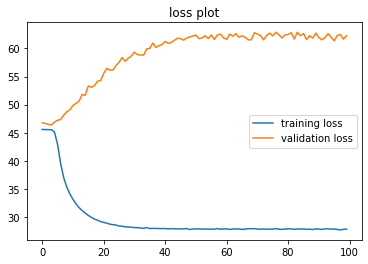

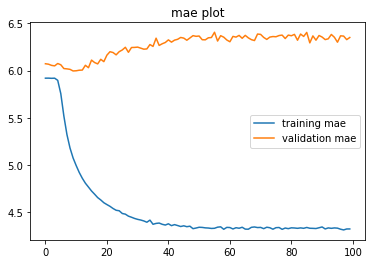

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 flipout_dense (FlipoutDense  (None, 4)                16        
 )                                                               
                                                                 
 flipout_dense_1 (FlipoutDen  (None, 4)                40        
 se)                                                             
                                                                 
 flipout_dense_2 (FlipoutDen  (None, 4)                40        
 se)                                                             
                                                                 
 flipout_dense_3 (FlipoutDen  (None, 4)                40        
 se)                                                         

In [ ]:
if __name__ == "__main__":
    x_train = np.linspace(-4.0, 4.0, num=1200)
    x_val = np.linspace(-7.0, 7.0, num=200)

    y_train = toy_function(x_train)
    y_val = toy_function(x_val)

    x_test = np.linspace(-7.0, 7.0, num=1000)
    x_test = x_test.reshape((-1, 1))

    y_test = toy_function(x_test)

    model = mlp_flipout_model()
    
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val), verbose=1)

    plt.plot(range(epochs), history.history['loss'], label='training loss')
    plt.plot(range(epochs), history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.title('loss plot')
    plt.show()

    plt.plot(range(epochs), history.history['mae'], label='training mae ')
    plt.plot(range(epochs), history.history['val_mae'], label='validation mae')
    plt.legend()
    plt.title('mae plot')
    plt.show()

    model.summary()
    st_model = StochasticRegressor(model)

    y_pred_mean, y_pred_std = st_model.predict(x_test, num_samples=100)
    y_pred_mean = y_pred_mean.ravel()
    y_pred_std = y_pred_std.ravel()


    score = gaussian_interval_score(y_test, y_pred_mean, y_pred_std)
    y_pred_mean = y_pred_mean.reshape((-1,))
    y_pred_std = y_pred_std.reshape((-1,))
    y_pred_up_1 = y_pred_mean + y_pred_std
    y_pred_down_1 = y_pred_mean - y_pred_std

    plt.plot(x_train, y_train, '.', color=(0.9, 0.0, 0.0, 0.7), markersize=0.5, label="Train Set")

    plt.fill_between(x_test.ravel(), y_pred_down_1, y_pred_up_1, color=(0, 0, 0.9, 0.7), label="One $\sigma$ CI")
    plt.plot(x_test.ravel(), y_pred_mean, '.', color=(0, 0.9, 0.0, 0.8), markersize=0.2, label="Mean")

    #plt.set_title("{}\nInterval Score: {:.2f}".format(key, score))
    plt.set_ylim([-20.0, 20.0])

    plt.axvline(x=-4.0, color="black", linestyle="dashed")
    plt.axvline(x= 4.0, color="black", linestyle="dashed")
    plt.get_xaxis().set_ticks([])
    plt.get_yaxis().set_ticks([])    

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.savefig("uncertainty-toy-regression.png", bbox_inches="tight")
    #plt.savefig("uncertainty-toy-regression.pdf", bbox_inches="tight")
    plt.show()